In [177]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/code/manishaelok/mall-customer-segmentation-kmeans

In [178]:
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [180]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


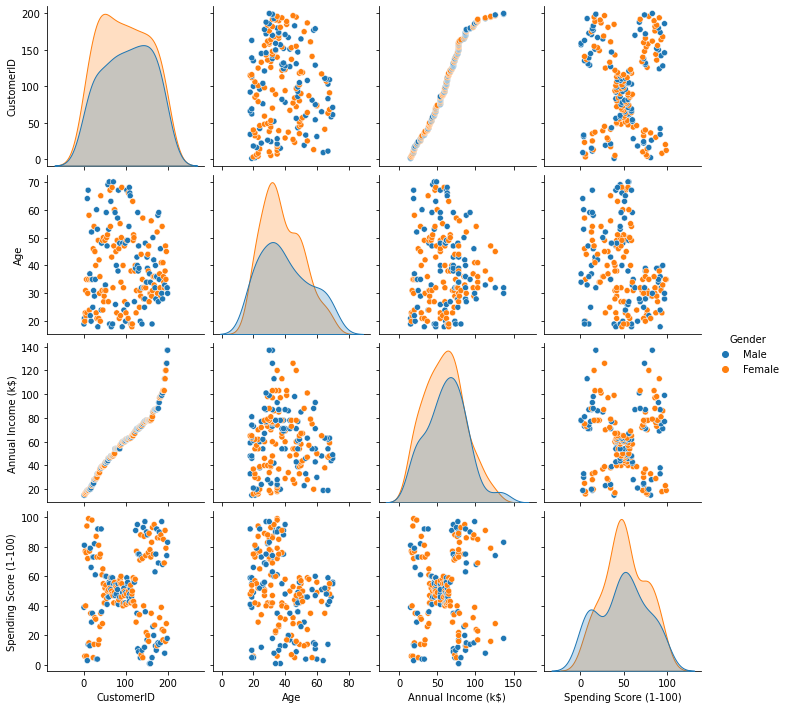

In [181]:
sns.pairplot(data, hue='Gender')

# ***Pré-processamento: ✅***
1.   Lidar com itens ausentes
2.   Remova alguns outliers
3.   Formato de dados padronizado 
4.   Aplicar Elbow para ver quantidade de clusters



In [182]:
# Utilização apenas das colunas que precisamos para preveer
clustering_data = data.iloc[:,[3, 4]].values

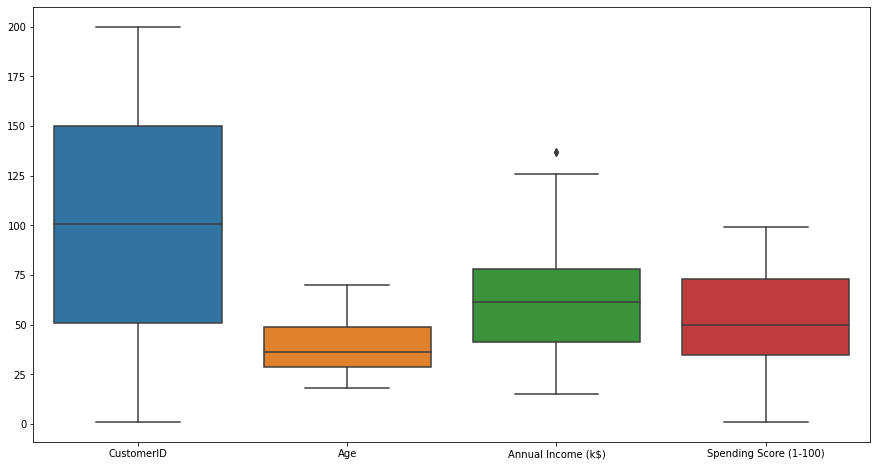

In [183]:
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

In [184]:
# Remoção de outliers:
print("Old Shape: ", data.shape)
q1 = data['Annual Income (k$)'].quantile(0.25)
q3 = data['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
lower_bound  = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
data = data.drop(data[data['Annual Income (k$)'] < lower_bound].index)
data = data.drop(data[data['Annual Income (k$)'] > upper_bound].index)
print("New Shape: ", data.shape)

Old Shape:  (200, 5)
New Shape:  (198, 5)


In [185]:
# Elbow para descobrir o número de clusters
elbow = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_data)
    elbow.append(kmeans.inertia_)

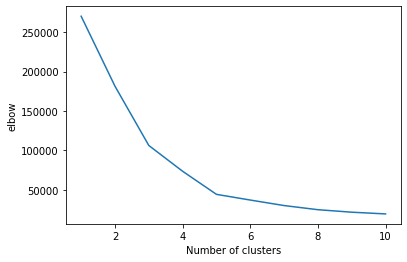

In [186]:
plt.plot(range(1, 11), elbow)
plt.xlabel('Number of clusters')
plt.ylabel('elbow')
plt.show()

Aplicação do KMEANS:

- Podemos perceber através do Elbow, que a melhor quantidade de Clusters possíveis é 5, pois é aonde a curva de cotovelo fica mais acentuada.

In [187]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clustering_data)

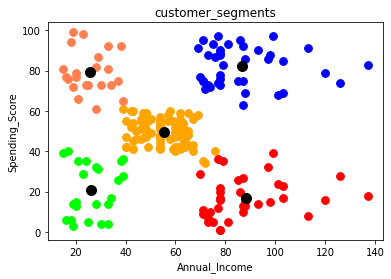

In [188]:
plt.scatter(clustering_data[Y==0, 0], clustering_data[Y==0, 1], s=60, c='orange', label='Cluster 1')
plt.scatter(clustering_data[Y==1, 0], clustering_data[Y==1, 1], s=60, c='red', label='Cluster 2')
plt.scatter(clustering_data[Y==2, 0], clustering_data[Y==2, 1], s=60, c='lime', label='Cluster 3')
plt.scatter(clustering_data[Y==3, 0], clustering_data[Y==3, 1], s=60, c='coral', label='Cluster 4')
plt.scatter(clustering_data[Y==4, 0], clustering_data[Y==4, 1], s=60, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()